<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-3" data-toc-modified-id="Chapter-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 3</a></span></li></ul></div>

## Chapter 3

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

co2_levels = pd.read_csv('ch2_co2_levels.csv', parse_dates=['datestamp'])
co2_levels = co2_levels.set_index('datestamp')

# really important - stats models can't handle NaN's!
# but it gives no hints - just empty plots
# took a while to chance upon that
co2_levels['co2'] = co2_levels['co2'].fillna(method='bfill')
co2_levels.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
co2    2284 non-null float64
dtypes: float64(1)
memory usage: 35.7 KB


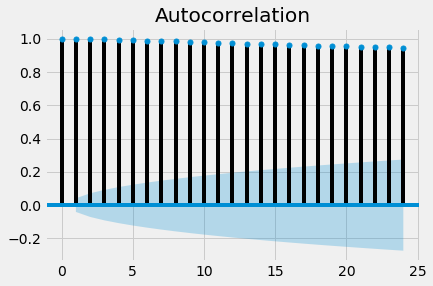

In [85]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

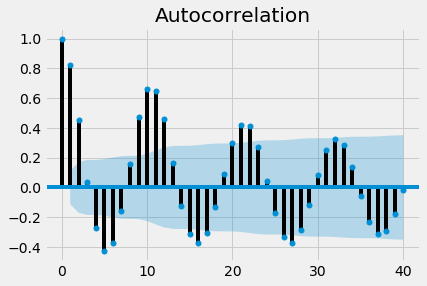

In [86]:
import statsmodels.api as sm
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.show()

In [87]:
# Penny dropped - partial auto-correlation is not what I thought.
# If you have data with a strong 5 year pattern, and a weak 10 year pattern
# You can't see the ten year pattern in an ACF - but you can in a PACF. It
# removes ALL the prior effects, including the 5 year pattern, to calculate
# what tens years genuinely contributes. Nifty.

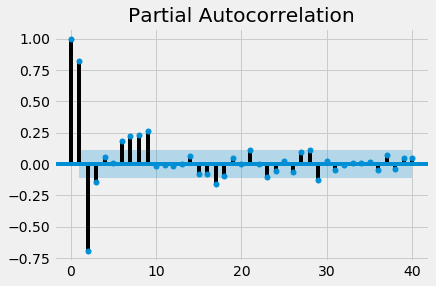

In [88]:
# See how PACF removes the 5 year repeating pattern
sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40)
plt.show()

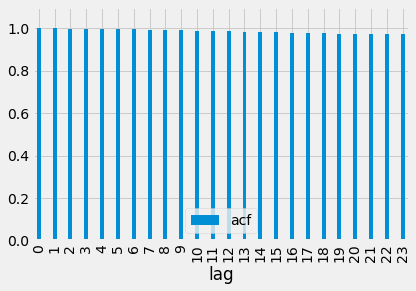

In [89]:
acfs = []
lags = []
for lag in range(24):
    lags.append(lag)
    acfs.append(co2_levels['co2'].autocorr(lag))

df = pd.DataFrame({'lag': lags, 'acf': acfs})
df = df.set_index('lag')

df.plot(kind='bar', width=0.25)
plt.ylim(bottom=0, top=1.1)
plt.show()

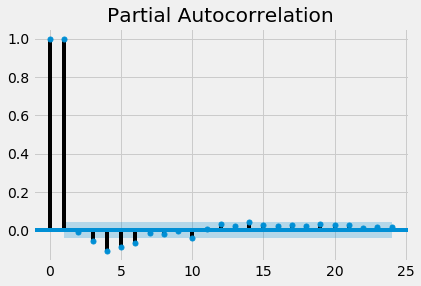

In [90]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

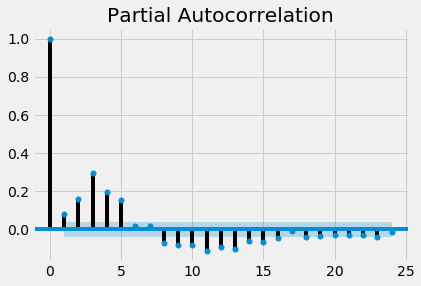

In [93]:
co2_stationary = co2_levels - co2_levels.shift(1)
fig = tsaplots.plot_pacf(co2_stationary['co2'][1:], lags=24)
plt.show()

In [95]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

                 co2
datestamp           
1958-03-29  1.028042
1958-04-05  1.235242
1958-04-12  1.412344
1958-04-19  1.701186
1958-04-26  1.950694
1958-05-03  2.032939
1958-05-10  2.445506
1958-05-17  2.535041
1958-05-24  2.662031
1958-05-31  2.837948
1958-06-07  2.786137
1958-06-14  2.897139
1958-06-21  2.700962
1958-06-28  2.637389
1958-07-05  2.499487
1958-07-12  2.328869
1958-07-19  2.016146
1958-07-26  1.696378
1958-08-02  1.320640
1958-08-09  0.900761
1958-08-16  0.515989
1958-08-23  0.086897
1958-08-30 -0.474590
1958-09-06 -0.810900
1958-09-13 -1.287685
1958-09-20 -1.805108
1958-09-27 -2.068716
1958-10-04 -2.560531
1958-10-11 -2.856752
1958-10-18 -3.108765
...              ...
2001-06-09  1.320640
2001-06-16  0.900761
2001-06-23  0.515989
2001-06-30  0.086897
2001-07-07 -0.474590
2001-07-14 -0.810900
2001-07-21 -1.287685
2001-07-28 -1.805108
2001-08-04 -2.068716
2001-08-11 -2.560531
2001-08-18 -2.856752
2001-08-25 -3.108765
2001-09-01 -3.170460
2001-09-08 -3.267396
2001-09-15 -3

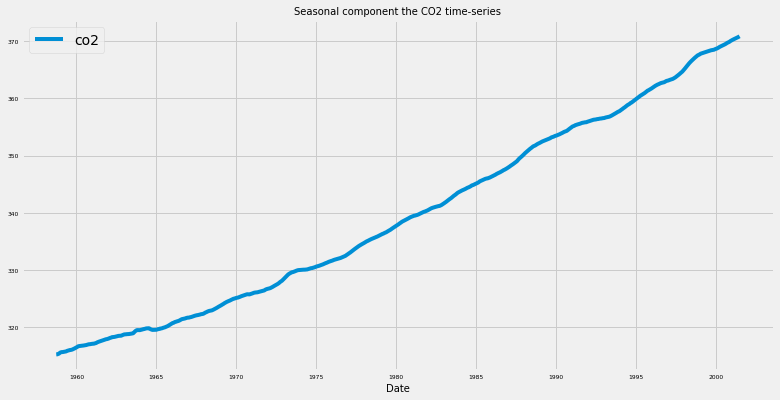

In [99]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

In [103]:
from urllib.request import urlretrieve
file = 'ch3_airline_passengers.csv'
url_path = 'https://assets.datacamp.com/production/repositories/1259/datasets/f8f1084c73032207abfc6b8a2499cab410bcfd62/'

urlretrieve(url_path+file, file)

airline = pd.read_csv(file, parse_dates=['Month'], index_col='Month')
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
AirPassengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


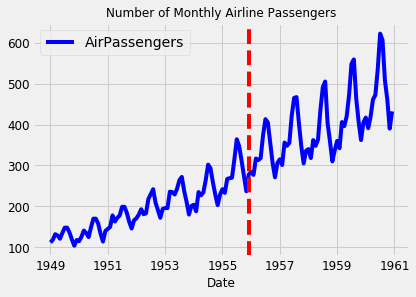

In [106]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

In [108]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


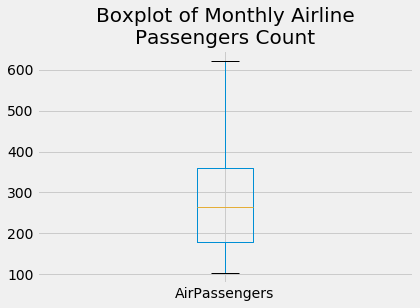

In [109]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

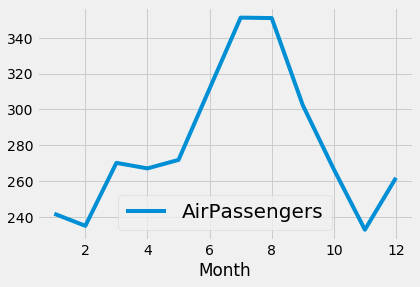

In [111]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

In [112]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [114]:
airline_decomposed = pd.concat([trend, seasonal], axis=1)
airlin

,AirPassengers,AirPassengers
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313
1949-06-01,NaN,35.402778
1949-07-01,126.791667,63.830808
1949-08-01,127.250000,62.823232
1949-09-01,127.958333,16.520202


In [ ]:
# Print the first 5 rows of airline_decomposed
print(____)

# Plot the values of the airline_decomposed DataFrame
ax = ____.____(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()